## Machine Learning - Decision Tree
###### author: *Thiago V. Lemes*

###### e-mail: *lemes_vilarinho@yahoo.com.br*

###### LinkedIn: *https://www.linkedin.com/in/thiago-vilarinho-lemes-b1232727/*

In [ ]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np

In [ ]:
# Máscara para os números decimais
pd.options.display.float_format='{:.2f}'.format

In [ ]:
# Importando os dados
df = pd.read_csv('/content/drive/MyDrive/Dataset/california_housing_train.csv')
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.00,5612.00,1283.00,1015.00,472.00,1.49,66900.00
1,-114.47,34.40,19.00,7650.00,1901.00,1129.00,463.00,1.82,80100.00


In [ ]:
df.shape

(17000, 9)

In [ ]:
colunas = [
  'longitude',
  'latitude',
  'idade_media_casas', # housing_median_age
  'total_quartos', # total_rooms
  'total_suites', # total_bedrooms
  'populacao', # population
  'familias', # households
  'renda_media', # median_income
  'valor_medio_casa' # median_house_value
]

In [ ]:
# Renomeando colunas
df.set_axis(colunas, axis=1, inplace=True)

## Machine Learning - Treinando o modelo

In [ ]:
# Bibliotecas do sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split # Divisor do dataset para treino e validação
from sklearn.metrics import mean_squared_error # erro quadrático médio
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Filtrando todos os dados das features menos a 'median_house_value' que é a target
# Features
x = df.drop('valor_medio_casa', axis=1)
x.head(2)

,longitude,latitude,idade_media_casas,total_quartos,total_suites,populacao,familias,renda_media
0,-114.31,34.19,15.00,5612.00,1283.00,1015.00,472.00,1.49
1,-114.47,34.40,19.00,7650.00,1901.00,1129.00,463.00,1.82


In [ ]:
# Filtrando todos os dados da target 'median_house_value'
# Target
y = df.valor_medio_casa
y[1]

80100.0

In [ ]:
# Filtrando as amostras para treino e validação 
# train_test_split - serve para dividir o array
# x - Features
# y - Target
# test_size - define em % o tamanho do conjunto de teste

xtr, xval, ytr, yval = train_test_split(x, y, test_size=0.5, random_state=0)

In [ ]:
# Criando a arvore de decisão
# random_state - semente da função random
# arvore =  tree.DecisionTreeRegressor(max_depth=11, random_state=0) 1º forma

# Otimização
# max_depth - profundidade da árvore, utilizado para não dar overfitting
# min_samples_leaf - quantos exemplos em cada nó final
arvore =  tree.DecisionTreeRegressor(min_samples_leaf=21, random_state=0)

# Treinando o algoritmo
arvore.fit(xtr, ytr)

DecisionTreeRegressor(min_samples_leaf=21, random_state=0)

In [ ]:
# Validação
p = arvore.predict(xval)

# Erro quadrático médio
np.sqrt(mean_squared_error(yval, p))

62294.23381162341

In [ ]:
# Testes realizados
# Valores de profundidade da arvore, forma de encotrar o melhor valor, serve tanto para classificação quanto para regressão

# 1º Forma
# max_depth=None -> 72999.00036346912
# max_depth=2    -> 86143.9160569026
# max_depth=8    -> 67216.3316440665
# max_depth=9    -> 66671.7497213204 --> ideal
# max_depth=10   -> 66782.5832402367
# max_depth=11   -> 67638.13818404468

# 2º Forma
# min_samples_leaf=1 -> 69979.56423380405
# min_samples_leaf=5 -> 64806.713441809865
# min_samples_leaf=8 -> 63235.123980199794
# min_samples_leaf=21 -> 62294.23381162341 --> ideal
# min_samples_leaf=29 -> 62566.17150840357

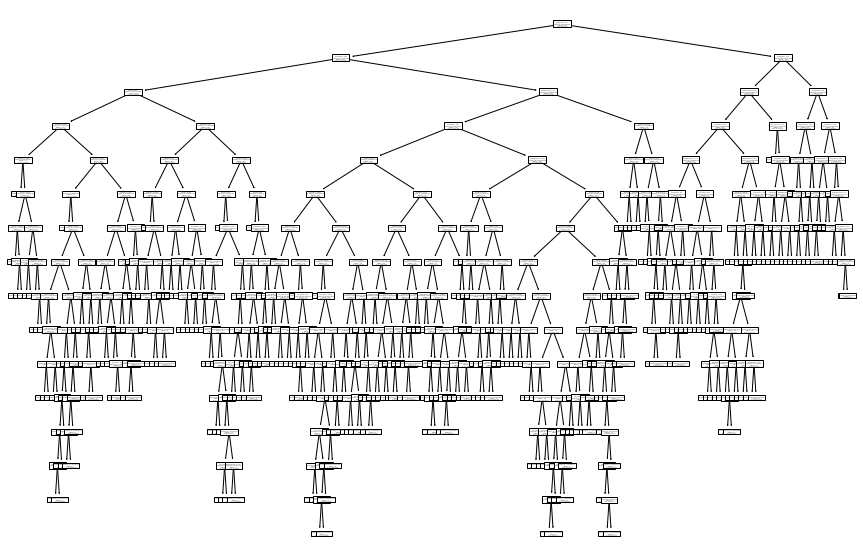

In [ ]:
# Plot da arvore treinada
pylab.figure(figsize=(15,10))
tree.plot_tree(arvore, feature_names=xtr.columns);